<a href="https://colab.research.google.com/github/ardcsr/testx/blob/master/plotR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls -al

total 16
drwxr-xr-x 4 root root 4096 Nov 20 18:16 .
drwxr-xr-x 1 root root 4096 Nov 22 04:04 ..
drwxr-xr-x 4 root root 4096 Nov 20 18:06 .config
drwxr-xr-x 2 root root 4096 Nov 20 18:17 sample_data


In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          40G  6.9G   31G  19% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  4.0K  6.4G   1% /var/colab
/dev/sda1        46G  8.5G   37G  19% /etc/hosts
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [4]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:9 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [264 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [1,364 B]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Package

In [5]:
!apt-get install r-base

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev bsdmainutils bzip2-doc cdbs
  debhelper dh-autoreconf dh-strip-nondeterminism dh-translations file
  fontconfig gettext gettext-base groff-base intltool intltool-debian jq
  libarchive-cpio-perl libarchive-zip-perl libauthen-sasl-perl libbz2-dev
  libcairo2 libcroco3 libdata-dump-perl libdatrie1 libdrm-amdgpu1
  libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libencode-locale-perl
  libfile-basedir-perl libfile-desktopentry-perl libfile-listing-perl
  libfile-mimeinfo-perl libfile-stripnondeterminism-perl libfile-which-perl
  libfont-afm-perl libfontenc1 libgl1 libgl1-mesa-dri libgl1-mesa-glx
  libglx-mesa0 libglx0 libhtml-form-perl libhtml-format-perl
  libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libht

In [6]:
!pip install rpy2==2.8.6

    100% |████████████████████████████████| 194kB 6.4MB/s 
  Running setup.py bdist_wheel for rpy2 ... - \ | / - \ | / - \ done
  Stored in directory: /root/.cache/pip/wheels/73/2e/59/e07ee179dc81c72f4e741773e0c7166322891a48984a715648
Successfully built rpy2


In [7]:
!R


R version 3.4.4 (2018-03-15) -- "Someone to Lean On"
Copyright (C) 2018 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('ggplot2')
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘glue’, ‘magrittr’, ‘stringi’, ‘colorspace’, ‘assertthat’, ‘fansi’, ‘utf8’, ‘Rcpp’, ‘stringr’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘cli’, ‘crayon’, ‘pil

In [9]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
%%R
install.packages('ggplot2')
install.packages('tidyr')

In [13]:
%R require(ggplot2); require(tidyr)

array([1], dtype=int32)

In [0]:
import numpy as np
import pandas as pd 
np.random.seed(42)
# Make a pandas DataFrame
df = pd.DataFrame(np.random.normal(0,1,size=(100, 3)), columns=list('ABC'))
df['C'] = df['C'] + 2


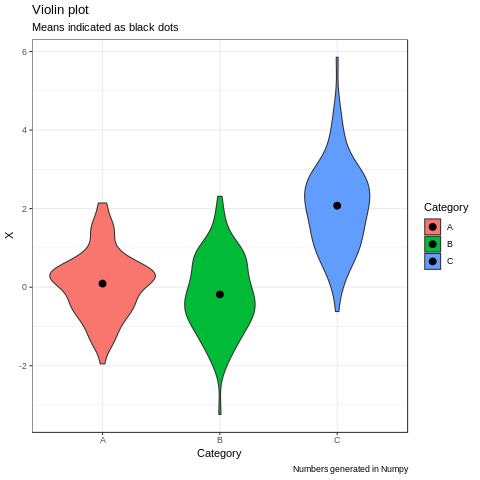

In [16]:
%%R -i df
df %>% 
  gather("Category", "X") %>%
  ggplot(aes(x = Category, y = X, fill = Category)) +
    geom_violin() +
    stat_summary(fun.y=mean, color='black', geom='point', size = 3) +
    labs(title = "Violin plot",
         subtitle = "Means indicated as black dots",
         captions = "Numbers generated in Numpy") +
    theme_bw()

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


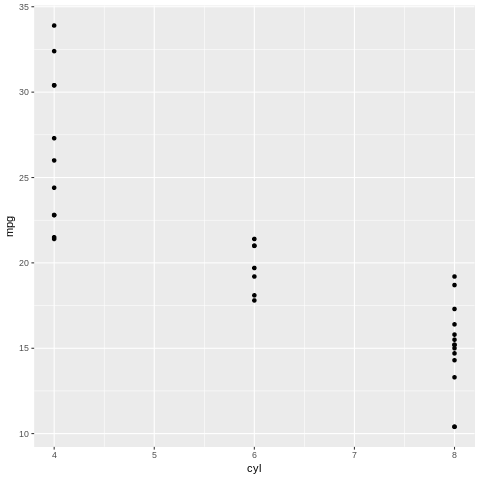

In [17]:
%%R
# %%R คือการเปลี่ยนเป็น ใช้คำสั่งต่างๆของ R แทน ไม่สามารถใช้ python ได้ถ้าอยู่ ใน R
str(mtcars)
ggplot(mtcars, aes(x = cyl, y = mpg)) +geom_point()


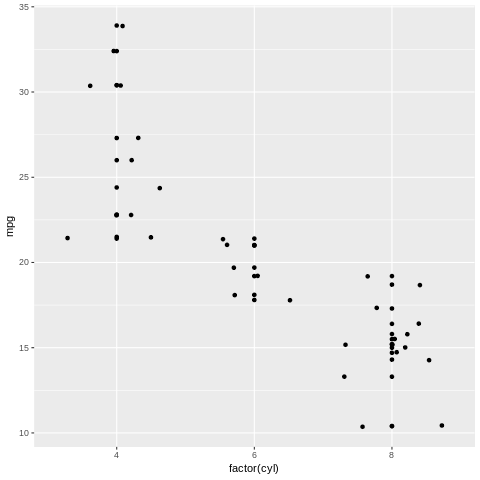

In [53]:
%%R
ggplot(mtcars, aes(x = factor(cyl), y = mpg)) +
  geom_point()+
  geom_jitter()

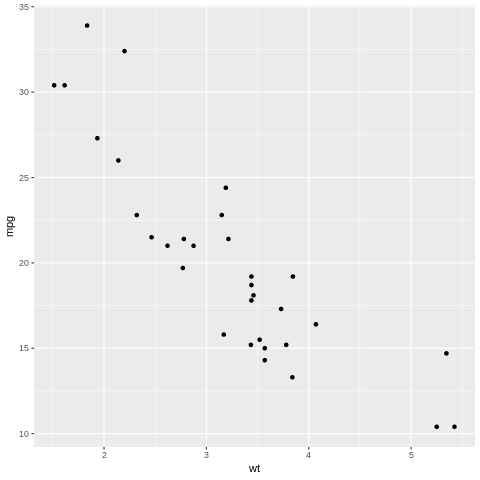

In [31]:
%%R
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()

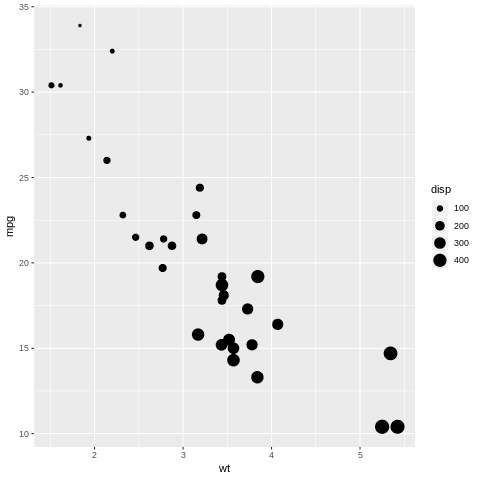

In [32]:
%%R
ggplot(mtcars, aes(x = wt, y = mpg, size = disp)) +
  geom_point()

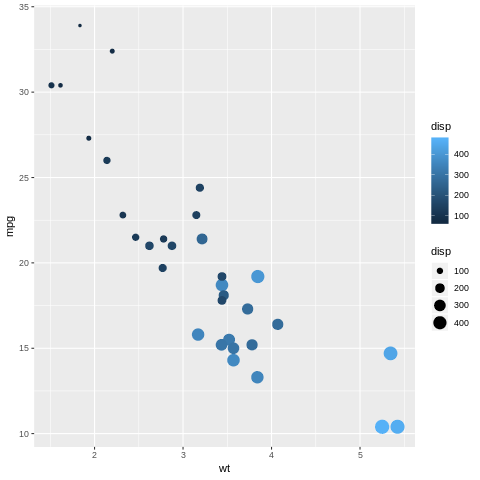

In [34]:
%%R
ggplot(mtcars, aes(x = wt, y = mpg, color = disp,size = disp)) +
  geom_point()

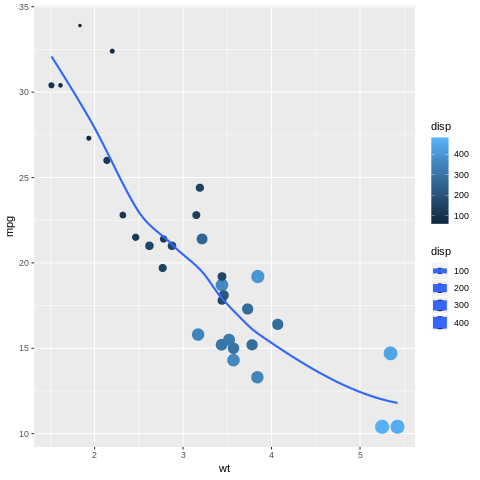

In [46]:
%%R
ggplot(mtcars, aes(x = wt, y = mpg, color = disp,size = disp)) +
  geom_point(alpha = 1)+geom_smooth( se = FALSE)

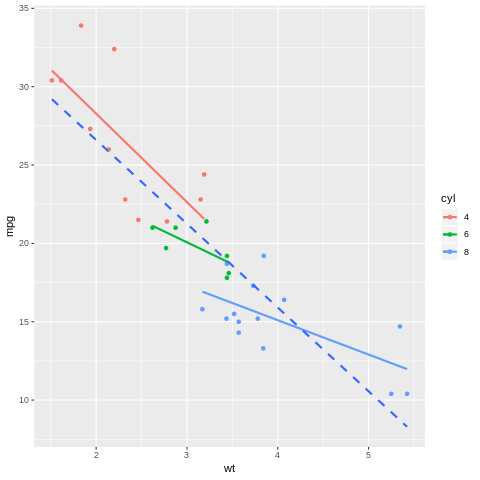

In [48]:
%%R
mtcars$cyl <- as.factor(mtcars$cyl)
ggplot(mtcars, aes(x = wt, y = mpg, col = cyl)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  geom_smooth(aes(group = 1), method = "lm", se = FALSE, linetype = 2)

In [51]:
%%R
mtcars$cyl <- as.factor(mtcars$cyl)
iris

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1            5.1         3.5          1.4         0.2     setosa
2            4.9         3.0          1.4         0.2     setosa
3            4.7         3.2          1.3         0.2     setosa
4            4.6         3.1          1.5         0.2     setosa
5            5.0         3.6          1.4         0.2     setosa
6            5.4         3.9          1.7         0.4     setosa
7            4.6         3.4          1.4         0.3     setosa
8            5.0         3.4          1.5         0.2     setosa
9            4.4         2.9          1.4         0.2     setosa
10           4.9         3.1          1.5         0.1     setosa
11           5.4         3.7          1.5         0.2     setosa
12           4.8         3.4          1.6         0.2     setosa
13           4.8         3.0          1.4         0.1     setosa
14           4.3         3.0          1.1         0.1     setosa
15           5.8         